In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
raw_data = pd.read_csv('FeatureSet.csv')
raw_data.head(5)

,Var_15_qr,Var_15_qx,Var_15_qy,Var_15_qz,Var_16_qr,Var_16_qx,Var_16_qy,Var_16_qz,Var_17_qr,Var_17_qx,...,Cov_17_18_qz,Cov_17_19_qr,Cov_17_19_qx,Cov_17_19_qy,Cov_17_19_qz,Cov_18_19_qr,Cov_18_19_qx,Cov_18_19_qy,Cov_18_19_qz,class
0,0.000313,0.003230,0.000616,0.003292,0.000051,0.001721,0.000683,0.000773,0.005592,0.003601,...,-0.006275,-0.001331,0.000297,0.000303,0.001013,0.001119,-0.001948,-0.000260,-0.000386,Jab
1,0.000673,0.004623,0.000179,0.002054,0.000160,0.003014,0.000917,0.001730,0.004075,0.002633,...,-0.002660,-0.001594,0.000323,0.000447,0.001794,0.001149,-0.002598,-0.000181,-0.000161,Jab
2,0.000605,0.002843,0.000222,0.001603,0.000016,0.001954,0.000575,0.000914,0.002856,0.001607,...,-0.003839,-0.000857,-0.000103,0.000387,0.001186,0.000906,-0.001567,-0.000430,-0.000118,Jab
3,0.000368,0.002182,0.000140,0.000913,0.000041,0.001484,0.000567,0.000716,0.002960,0.004471,...,0.002660,-0.000856,0.000212,0.000459,0.000896,0.000570,-0.001941,0.000005,-0.000046,Jab
4,0.000439,0.001805,0.000204,0.000550,0.000051,0.001403,0.000524,0.000528,0.002901,0.004121,...,-0.004024,-0.000658,0.000500,0.000888,0.000786,0.000796,-0.001837,-0.000033,-0.000173,Jab


In [70]:
new_data=raw_data.interpolate(method='linear', axis=0, limit=None, inplace=False, downcast=None)
new_data.head(5)

,Var_15_qr,Var_15_qx,Var_15_qy,Var_15_qz,Var_16_qr,Var_16_qx,Var_16_qy,Var_16_qz,Var_17_qr,Var_17_qx,...,Cov_17_18_qz,Cov_17_19_qr,Cov_17_19_qx,Cov_17_19_qy,Cov_17_19_qz,Cov_18_19_qr,Cov_18_19_qx,Cov_18_19_qy,Cov_18_19_qz,class
0,0.000313,0.003230,0.000616,0.003292,0.000051,0.001721,0.000683,0.000773,0.005592,0.003601,...,-0.006275,-0.001331,0.000297,0.000303,0.001013,0.001119,-0.001948,-0.000260,-0.000386,Jab
1,0.000673,0.004623,0.000179,0.002054,0.000160,0.003014,0.000917,0.001730,0.004075,0.002633,...,-0.002660,-0.001594,0.000323,0.000447,0.001794,0.001149,-0.002598,-0.000181,-0.000161,Jab
2,0.000605,0.002843,0.000222,0.001603,0.000016,0.001954,0.000575,0.000914,0.002856,0.001607,...,-0.003839,-0.000857,-0.000103,0.000387,0.001186,0.000906,-0.001567,-0.000430,-0.000118,Jab
3,0.000368,0.002182,0.000140,0.000913,0.000041,0.001484,0.000567,0.000716,0.002960,0.004471,...,0.002660,-0.000856,0.000212,0.000459,0.000896,0.000570,-0.001941,0.000005,-0.000046,Jab
4,0.000439,0.001805,0.000204,0.000550,0.000051,0.001403,0.000524,0.000528,0.002901,0.004121,...,-0.004024,-0.000658,0.000500,0.000888,0.000786,0.000796,-0.001837,-0.000033,-0.000173,Jab


In [71]:
#check for zero
(new_data == 0).sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1050    0
1051    0
1052    0
1053    0
1054    0
1055    0
1056    0
1057    0
1058    0
1059    0
1060    0
1061    0
1062    0
1063    0
1064    0
1065    0
1066    0
1067    0
1068    0
1069    0
1070    0
1071    0
1072    0
1073    0
1074    0
1075    0
1076    0
1077    0
1078    0
1079    0
Length: 1080, dtype: int64

In [72]:
lb_enc = LabelEncoder()
new_data["new_class"] = lb_enc.fit_transform(new_data["class"])
new_data[["class", "new_class"]]
df = new_data.drop(['class'], axis = 1)
df.head(10)

,Var_15_qr,Var_15_qx,Var_15_qy,Var_15_qz,Var_16_qr,Var_16_qx,Var_16_qy,Var_16_qz,Var_17_qr,Var_17_qx,...,Cov_17_18_qz,Cov_17_19_qr,Cov_17_19_qx,Cov_17_19_qy,Cov_17_19_qz,Cov_18_19_qr,Cov_18_19_qx,Cov_18_19_qy,Cov_18_19_qz,new_class
0,0.000313,0.003230,0.000616,0.003292,0.000051,0.001721,0.000683,0.000773,0.005592,0.003601,...,-0.006275,-0.001331,0.000297,0.000303,0.001013,0.001119,-0.001948,-0.000260,-0.000386,1
1,0.000673,0.004623,0.000179,0.002054,0.000160,0.003014,0.000917,0.001730,0.004075,0.002633,...,-0.002660,-0.001594,0.000323,0.000447,0.001794,0.001149,-0.002598,-0.000181,-0.000161,1
2,0.000605,0.002843,0.000222,0.001603,0.000016,0.001954,0.000575,0.000914,0.002856,0.001607,...,-0.003839,-0.000857,-0.000103,0.000387,0.001186,0.000906,-0.001567,-0.000430,-0.000118,1
3,0.000368,0.002182,0.000140,0.000913,0.000041,0.001484,0.000567,0.000716,0.002960,0.004471,...,0.002660,-0.000856,0.000212,0.000459,0.000896,0.000570,-0.001941,0.000005,-0.000046,1
4,0.000439,0.001805,0.000204,0.000550,0.000051,0.001403,0.000524,0.000528,0.002901,0.004121,...,-0.004024,-0.000658,0.000500,0.000888,0.000786,0.000796,-0.001837,-0.000033,-0.000173,1
5,0.000571,0.003266,0.000394,0.001937,0.000097,0.001723,0.000599,0.001027,0.002896,0.003269,...,-0.002815,-0.000970,0.000081,0.000699,0.001407,0.000794,-0.001802,-0.000427,-0.000187,1
6,0.000368,0.002016,0.000063,0.000796,0.000080,0.001376,0.000713,0.000912,0.002759,0.001430,...,-0.004611,-0.000960,-0.000369,0.000063,0.001669,0.000936,-0.001778,-0.000918,-0.000260,1
7,0.000458,0.001178,0.000050,0.000315,0.000044,0.000989,0.000543,0.000548,0.003062,0.001632,...,-0.001572,-0.000831,-0.000025,0.000234,0.000665,0.000590,-0.001810,-0.000457,-0.000076,1
8,0.000813,0.002831,0.000276,0.001638,0.000124,0.002195,0.000949,0.001367,0.002877,0.002534,...,0.001152,-0.001106,0.000112,0.000508,0.001977,0.000824,-0.001695,-0.000520,-0.000126,1
9,0.000604,0.003279,0.000247,0.001791,0.000147,0.001864,0.000847,0.001259,0.002580,0.001750,...,-0.003241,-0.001038,-0.000310,-0.000039,0.001336,0.000992,-0.001558,-0.000991,-0.000089,1


In [73]:
data_X = df.drop(['new_class'], axis=1)
data_y = pd.DataFrame(df['new_class'])
y = data_y.loc[:,:].values
X = data_X.iloc[:,:].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(864, 115)
(216, 115)
(864, 1)
(216, 1)


### Classification using SVM (entire dataset)

In [75]:
import time
start_time = time.time()
clf_SVM = LinearSVC()
clf_SVM.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [76]:
y_pred_SVM = clf_SVM.predict(X_test)
score_SVM = clf_SVM.score(X_test, y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.16666666666666666
--- 1.9896941184997559 seconds ---


### Classification using ANN (entire dataset)

In [77]:
import time
start_time = time.time()
max_test_score = 0
for i in range(1,10):
    for j in range(1, 10):
        clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(i, j), random_state=0)
        clf_mlp.fit(X_train, y_train)
        train_score = clf_mlp.score(X_train, y_train)
        test_score = clf_mlp.score(X_test, y_test)
        if test_score > max_test_score:
            related_train_score = train_score
            max_test_score = test_score
            max_i = i
            max_j = j
            best_clf_mlp = clf_mlp
print(best_clf_mlp)
print("1st hl nodes num: ", max_i, "; 2nd hl nodes num: ", max_j, "; train score: ", related_train_score, "; test score: ", max_test_score)
print("--- %s seconds ---" % (time.time() - start_time))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
1st hl nodes num:  9 ; 2nd hl nodes num:  6 ; train score:  0.2337962962962963 ; test score:  0.25462962962962965
--- 9.835839986801147 seconds ---


### Getting an idea about the correlation through heatmap 

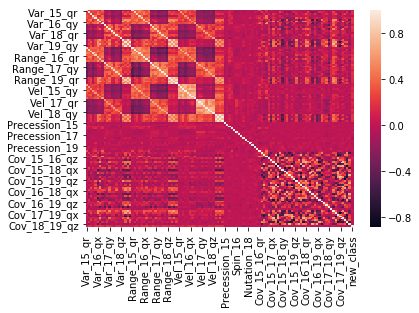

In [78]:
sns.heatmap(df.corr())

### Dimentionality reduction using PCA (not appropriate)

In [79]:
pca = PCA(n_components=5)
pca.fit(X,y)
pca_Data = pca.transform(X)

In [80]:
pca_Data.shape

(1080, 5)

In [81]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(pca_Data[:,:], y, test_size=0.2, random_state=0, stratify=y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(864, 5)
(216, 5)
(864, 1)
(216, 1)


### Classification using SVM (after PCA)

In [82]:
import time
start_time = time.time()
clf_SVM = LinearSVC()
clf_SVM.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [83]:
y_pred_SVM = clf_SVM.predict(X_test)
score_SVM = clf_SVM.score(X_test, y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.18518518518518517
--- 0.19361519813537598 seconds ---


### Classification using ANN (after PCA)

In [84]:
import time
start_time = time.time()
max_test_score = 0
for i in range(1,10):
    for j in range(1, 10):
        clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(i, j), random_state=0)
        clf_mlp.fit(X_train, y_train)
        train_score = clf_mlp.score(X_train, y_train)
        test_score = clf_mlp.score(X_test, y_test)
        if test_score > max_test_score:
            related_train_score = train_score
            max_test_score = test_score
            max_i = i
            max_j = j
            best_clf_mlp = clf_mlp
print(best_clf_mlp)
print("1st hl nodes num: ", max_i, "; 2nd hl nodes num: ", max_j, "; train score: ", related_train_score, "; test score: ", max_test_score)
print("--- %s seconds ---" % (time.time() - start_time))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
1st hl nodes num:  3 ; 2nd hl nodes num:  3 ; train score:  0.2013888888888889 ; test score:  0.22685185185185186
--- 3.334616184234619 seconds ---


### Dimentionality reduction using LDA

In [85]:
lda = LDA(n_components = 5)
X_lda = lda.fit_transform(X, y) 
X_lda.shape

(1080, 5)

In [86]:
lda_data = np.vstack((X_lda.T, df['new_class'])).T
lda_df   = pd.DataFrame(data=lda_data, columns=("1st-component", "2nd-component", "3rd-component", "4th-component", "5th-component", "Class"))
lda_df.head(5)

,1st-component,2nd-component,3rd-component,4th-component,5th-component,Class
0,-2.095803,-4.373546,0.200721,3.574021,-1.140860,1.0
1,-1.322594,-3.137673,0.055307,2.995413,-1.455476,1.0
2,-1.524223,-2.663139,0.917929,2.269398,-0.512187,1.0
3,-1.778355,-3.318065,0.148708,2.753289,-0.949143,1.0
4,-1.340678,-3.501355,0.405684,2.416802,-1.144108,1.0


In [87]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=0, stratify=y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(864, 5)
(216, 5)
(864, 1)
(216, 1)


### Classification using SVM (after LDA)

In [88]:
import time
start_time = time.time()
clf_SVM = LinearSVC()
clf_SVM.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [89]:
y_pred_SVM = clf_SVM.predict(X_test)
score_SVM = clf_SVM.score(X_test, y_test)
test_score_SVM = clf_SVM.score(X_test,y_test)
train_score_SVM = clf_SVM.score(X_train,y_train)
best_clf_svm = clf_SVM
print("Test set Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM))
print("--- %s seconds ---" % (time.time() - start_time))

Test set Accuracy: 0.9537037037037037
--- 0.07797980308532715 seconds ---


In [90]:
y_pred_SVM = clf_SVM.predict(X_train)
score_SVM = clf_SVM.score(X_train, y_train)
test_score_SVM = clf_SVM.score(X_test,y_test)
train_score_SVM = clf_SVM.score(X_train,y_train)
best_clf_svm = clf_SVM
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_SVM))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9120370370370371
--- 0.1011347770690918 seconds ---


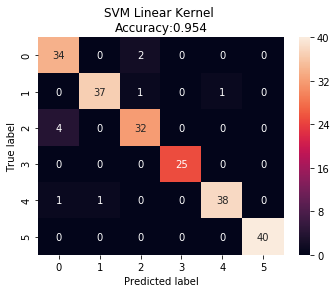

In [91]:
# # Creates a confusion matrix
y_svm_pred = best_clf_svm.predict(X_test)
cm = confusion_matrix(y_test, y_svm_pred) 

plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_svm_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Classification using ANN (after LDA)

In [92]:
import time
start_time = time.time()
max_test_score = 0
for i in range(1,10):
    for j in range(1, 10):
        clf_mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(i, j), random_state=0)
        clf_mlp.fit(X_train, y_train)
        train_score = clf_mlp.score(X_train, y_train)
        test_score = clf_mlp.score(X_test, y_test)
        if test_score > max_test_score:
            related_train_score = train_score
            max_test_score = test_score
            max_i = i
            max_j = j
            best_clf_mlp = clf_mlp
print(best_clf_mlp)
print("1st hl nodes num: ", max_i, "; 2nd hl nodes num: ", max_j, "; train score: ", related_train_score, "; test score: ", max_test_score)
print("---Time %s seconds ---" % (time.time() - start_time))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
1st hl nodes num:  5 ; 2nd hl nodes num:  8 ; train score:  0.9548611111111112 ; test score:  0.9398148148148148
---Time 12.654581069946289 seconds ---


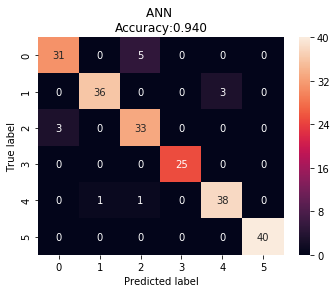

In [93]:
y_mlp_pred = best_clf_mlp.predict(X_test)
cm = confusion_matrix(y_test, y_mlp_pred) 
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('ANN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_mlp_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [94]:
print("MLP classifier prediction evaluation")
print(classification_report(y_test, y_mlp_pred, target_names=['0', '1', '2', '3', '4', '5']))

MLP classifier prediction evaluation
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.97      0.92      0.95        39
           2       0.85      0.92      0.88        36
           3       1.00      1.00      1.00        25
           4       0.93      0.95      0.94        40
           5       1.00      1.00      1.00        40

   micro avg       0.94      0.94      0.94       216
   macro avg       0.94      0.94      0.94       216
weighted avg       0.94      0.94      0.94       216



In [95]:
print("SVM classifier prediction evaluation")
print(classification_report(y_test, y_svm_pred, target_names=['0', '1', '2', '3', '4', '5']))

SVM classifier prediction evaluation
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.97      0.95      0.96        39
           2       0.91      0.89      0.90        36
           3       1.00      1.00      1.00        25
           4       0.97      0.95      0.96        40
           5       1.00      1.00      1.00        40

   micro avg       0.95      0.95      0.95       216
   macro avg       0.96      0.96      0.96       216
weighted avg       0.95      0.95      0.95       216



In [120]:
X_test.shape

(216, 5)

In [150]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

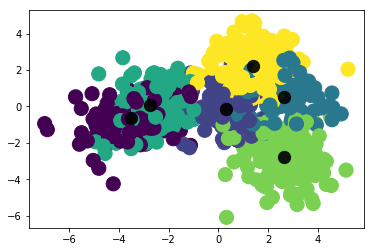

In [155]:
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_kmeans, s=200, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=150, alpha=0.9)

In [142]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_test)
y_kmeans2 = kmeans.predict(X_test)

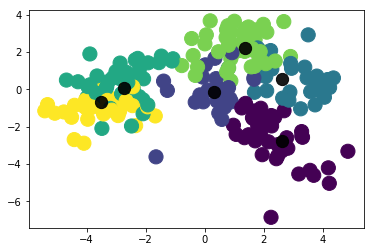

In [154]:
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_kmeans2, s=200, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=150, alpha=0.9)